# Optimisation

#### Fifth practical work, Monday,  October 26, 2020

The goal of this tutorial is to introduce the nonlinear and optimisation solvers available in scipy. We will apply optimization algorithms to find equilibrium positions by minimizing an energy functional.

A basic reference that you can read:

- [Scipy lecture on optimization](https://scipy-lectures.org/advanced/mathematical_optimization/index.html)

Further references:

- [A complete advanced book on convex optimization (Convex Optimization
Stephen Boyd and Lieven Vandenberghe, Cambridge University Press)](https://web.stanford.edu/~boyd/cvxbook/)
- [The documentation of scipy optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html)

The following libraries and functions will be used, you should load them. SymPy is a Python library for symbolic mathematics. If it is not installed, run in a terminal ```pip3 install sympy```, you should then be able to import SymPy. If it still does not work, try to uncomment the first two lines of the next cell.

In [1]:
#import sys
#sys.path.append('/usr/local/lib/python3.5/dist-packages') 
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.optimize as spsopt

### Exercise 1:  fitting data with Python

The amplitude of vibration and associated uncertainty are measured experimentally in a resonant system as a function of the angular frequency `omega`and are reported belowsolving a set of equations

In [15]:
omega = np.array([
    1., 1.31034483, 1.62068966, 1.93103448, 2.24137931, 2.55172414, 2.86206897,
    3.17241379, 3.48275862, 3.79310345, 4.10344828, 4.4137931, 4.72413793,
    5.03448276, 5.34482759, 5.65517241, 5.96551724, 6.27586207, 6.5862069,
    6.89655172, 7.20689655, 7.51724138, 7.82758621, 8.13793103, 8.44827586,
    8.75862069, 9.06896552, 9.37931034, 9.68965517, 10.
])

data = np.array([
    0.04150773, 0.0371691, 0.03457173, 0.03606553, 0.04250569, 0.0532648,
    0.04789209, 0.05525142, 0.06765767, 0.0639014, 0.07572266, 0.07941768,
    0.09191492, 0.09498583, 0.08378621, 0.07586005, 0.05776194, 0.07016361,
    0.04443133, 0.04656511, 0.03014858, 0.03892961, 0.02550914, 0.02325391,
    0.03829938, 0.01497713, 0.0208759, 0.0161226, 0.01492598, 0.02780553
])

data_unc = np.array([
    0.00369891, -0.00382985, 0.00473199, -0.0029319, 0.00877431, -0.00672701,
    0.00657006, -0.00760472, -0.00737787, -0.00219892, -0.00045908,
    -0.00667436, 0.00726961, -0.00829731, 0.00590811, -0.0040063, 0.00613973,
    0.00789512, 0.00208349, -0.00478441, 0.01039106, 0.00766629, -0.01484678,
    -0.00082685, -0.00998985, -0.00408177, -0.00373555, 0.00756316,
    -0.00123322, -0.00872292
])

We want to know if this system can be modeled by a forced harmonic oscillator, for which

$$\ddot{x}+2\xi \omega_0 \dot{x} + \omega_0^2x= F \cos(\omega t), ~~~~~~~ x(t) = \mathrm{Re}\left(Xe^{i\omega t} \right), ~~~~~~ \frac{X}{F} = \frac{1}{\sqrt{(\omega_0^2-\omega^2)^2+4\xi^2 \omega^2 \omega_0^2}} .$$

1. Plot the data to get a rough estimate of ω<sub>0</sub> and ξ. Don't forget to add proper axis labels.
2. Define a function ```resonance(omega,omega0,xi)``` that returns X/F defined above for given values of the parameters. 
3. Use this function to print the value of X/F for ω=1, ω<sub>0</sub>=2 and ξ=3. You should get 0.0808...
4. Read the documentation on the function ```spsopt.curve_fit``` [that you can find here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html), then compute the optimal values of ω<sub>0</sub> and ξ and the standard deviation errors on these parameters
5. Plot the experimental data with errorbars using ```plt.errorbar``` then add on this graph the theoretical fit with the best estimates. Add a legend, a title and axis labels.
6. Compute the reduced chi squared parameter defined below
$$\chi^2_\nu = \frac{1}{\nu} \sum_{N \textrm{ data points}} \frac{(O_n-f_n)^2}{\sigma_n^2}$$
with $O_n$ the n<sup>th</sup> value of ```data``` of uncertainty $\sigma_n$, $f_n$ the fit value for the same angular frequency and $\nu = N - p$ the number of degrees of freedom (N is the number of data points and p is the number of parameters to fit).

 A fit is accurate if $\chi^2_\nu \sim 1$ : is it valid here ? 

 *(Hint: you may want to use ```len(array)``` to get the length of an array, and np.sum(array) to compute the sum of an array)*
 

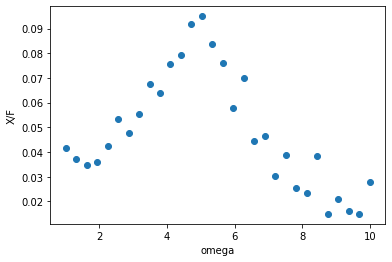

0.08084520834544433
omega = 5.180671076962539 +/- 0.020862718986677804 and xi = 0.2041691595415878 +/- 0.006274821018161275


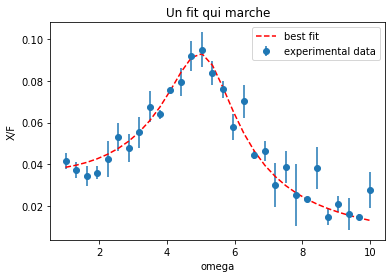

reduced chi squared :  1.1241918152694157


In [18]:
#Q1 
plt.plot(omega,data,'o')
plt.xlabel("omega")
plt.ylabel("X/F")
plt.show()
#Q2
def resonance(omega,omega0,xi):
    return 1./np.sqrt((omega0**2-omega**2)**2+4*xi**2*omega**2*omega0**2)
#Q3
print(resonance(1,2,3))
# Q4
f = resonance
xdata = omega
ydata = data
p0 = np.array([5, 2]) # initial guess, the data are generated with omega0=5 and xi=4
# uncertainty -> minimize chisq = sum((r / sigma) ** 2) with the residuals r = ydata - f(xdata, *popt)
sigma = data_unc
(fit_parameters, fit_covariance) = spsopt.curve_fit(f, xdata, ydata, p0, sigma, absolute_sigma=True)

omega_fit = np.abs(fit_parameters[0])
xi_fit=np.abs(fit_parameters[1])
[omega_std, xi_std] = np.sqrt(np.diag(fit_covariance))

print("omega = "+str(omega_fit)+" +/- "+str(omega_std)+ " and xi = "+str(xi_fit)+' +/- '+ str(xi_std))

#Q5
#omega_fit=5.03
#xi_fit=0.19

data_th=resonance(omega,omega_fit,xi_fit)
plt.plot(omega,data_th,'--r',label='best fit')
plt.errorbar(omega,data,data_unc,marker='o', label='experimental data', linestyle='none')
plt.legend()
plt.xlabel("omega")
plt.ylabel("X/F")
plt.title("Un fit qui marche")
plt.show()

#Q6
nu=len(data)-2
chisqred= (1/nu)*np.sum((data- data_th)**2/data_unc**2)
print("reduced chi squared : ", chisqred)

### Exercise 2: Minimization of a scalar function, a symmetric von Mises truss

We consider the truss skteched below, in which a mass M is connected to two springs of stiffness k and rest length L<sub>0</sub>. In this section, M can move only vertically, and its position is parameterized by a single degree of freedom, the height OM=H. The distance AB is fixed and equal to 2a.

In the reference configuration, the height of the point M is H<sub>0</sub>.  An external loading **F**=−F**e<sub>y</sub>** is then applied, F being progressively increased.

The system is conservative. We can find its equilibria by minimizing the potential energy E<sub>p</sub>(H). We use the following non-dimensional variables :


$$ H = ah, ~~ H_0 = ah_0, ~~ F= ka f, ~~L = a\ell, ~~ L_0 = a\ell_0, ~~ E_p = ka^2 e_p $$ 

<img src="add_files/TP5_1.png"  width="850"/>

1. What are the physical units of h, f and e<sub>p</sub>?

2. Show that the dimensionless potential energy of the system is 

$$ e_p(h)= \left( \sqrt{h^2+1} - \sqrt{h_0^2+1} \right)^2 + f h. $$

We start by looking for the *equilibria* as a function of f.
3. Define the symbolic function ```ep_symb``` and calculate symbolically its first and second derivatives (```dep_symb``` and ```ddep_symb```) by using `sympy`. ([Have a look at the sympy documentation](https://docs.sympy.org/latest/tutorial/intro.html)).

We assume h<sub>0</sub>=1/2.

4. Turn these three symbolic functions to numpy functions (```ep```, ```dep``` and ```ddep```). Print the values of these functions for h=0.2 and f=1.1.



*Hint*: To this end you can use the `sympy.lambdify` function as follows ```ep =  sympy.lambdify((h,f,h0),ep_symb,"numpy")```

5. Plot the potential energy e<sub>p</sub> as a function of h∈[-1,1] for f=0.02 and identify approximately several values of h corresponding to equilibrium points.

6. Use ```spsopt.fsolve``` ([see the documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)), to find these equilibrium positions accurately for f=0.02.

7. Redo questions 5. and 6. using the exact same code but for f=0.07: you should evidence that fsolve returns nonequilibrium positions.

8. Define a function ```equ_varf(fmin,fmax,Nstep, h0=0.5)``` that returns these equilibrium positions h and the corresponding value of the force f for ```Nstep``` values of f between ```fmin``` and ```fmax```. Take care to filter out nonequilibrium positions.

9. Plot these equilibrium positions in the (h,f) plane.

10. Define a function ```equ_stab_varf(fmin,fmax,Nstep, h0=0.5)``` similar to the one of Q7, but that in addition marks their stability.

11. Plot these equilibrium positions in the (h,f) plane with a color code for the stability (stable: blue, unstable: red).

12. Use a minimisation routine (e.g. ```spsopt.fmin```) to find only the stable equilibria and plot them in (h,f) plane.


**Correction**

Q1. h, f et ep sont sans dimension


Q2. L'énergie potentielle dimensionnée est donnée par 
$$E_p = \frac{1}{2}k \left(AM - L_0 \right)^2 + \frac{1}{2}k \left(BM - L_0 \right)^2 + FH(t) $$
Le dernier terme vient du travail de la force extérieure, $W = \int_0^t (-F) \times \dot{H}(t)\mathrm{d}t = -FH(t) + \mathrm{cst}$. Ainsi, AM=BM donne

$$E_p = k \left(AM - L_0 \right)^2 + FH(t) =  k \left(\sqrt{a^2+H(t)^2} - \sqrt{a^2+H_0^2} \right)^2 + FH(t) $$
qui donne le résultat annoncé en passant sans dimension.



In [2]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [3]:
# Q3
h = sym.Symbol('h')
h0 = sym.Symbol('h0')
f = sym.Symbol('f')
ep_symb= (sym.sqrt(h**2+1) - sym.sqrt(h0**2+1) )**2 + f * h
dep_symb=sym.diff(ep_symb,h)
ddep_symb=sym.diff(dep_symb,h)

In [4]:
ep_symb

f*h + (sqrt(h**2 + 1) - sqrt(h0**2 + 1))**2

In [5]:
dep_symb

f + 2*h*(sqrt(h**2 + 1) - sqrt(h0**2 + 1))/sqrt(h**2 + 1)

In [6]:
ddep_symb

2*h**2/(h**2 + 1) - 2*h**2*(sqrt(h**2 + 1) - sqrt(h0**2 + 1))/(h**2 + 1)**(3/2) + 2*(sqrt(h**2 + 1) - sqrt(h0**2 + 1))/sqrt(h**2 + 1)

In [7]:
#Q4

ep = sym.lambdify((h,f,h0),ep_symb,"numpy")
dep = sym.lambdify((h,f,h0),dep_symb,"numpy")
ddep = sym.lambdify((h,f,h0),ddep_symb,"numpy")

print("ep = ", ep(0.2,1.1,.5), "\ndep = ", dep(0.2,1.1,.5), "\nddep = ", ddep(0.2,1.1,.5))



ep =  0.22964914980172407 
dep =  1.0614709903464854 
ddep =  -0.10831254641112786


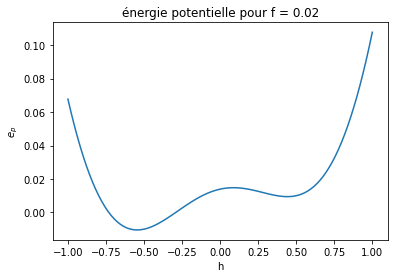

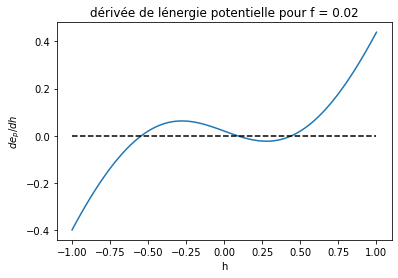

In [8]:
#Q5

listeh = np.linspace(-1.0, 1.0,100)
plt.plot(listeh, ep(listeh,0.02,.5),'-')
plt.xlabel('h')
plt.ylabel('$e_p$')
plt.title('énergie potentielle pour f = '+str(0.02))
plt.show()

plt.plot(listeh, dep(listeh,0.02,0.5),'-')
plt.plot(listeh, 0*dep(listeh,0.02,0.5),'--k')
plt.xlabel('h')
plt.ylabel('$d e_p/dh$')
plt.title('dérivée de lénergie potentielle pour f = '+str(0.02))
plt.show()



In [9]:
# Q6
pdep = 0.01  # la graine : le point de depart de l algo de newton-raph : pas trop loin de la solution si possible
f = 0.02  # valeur fixe du parametre f (force)
h0 = 0.5  # valeur fixe du parametre : hauteur du systeme a l etat naturel

for pdep in (-0.5, 0., .5):
    print("Racine proche de " + str(pdep)+" : ",
          spsopt.fsolve(dep, pdep, fprime=None, args=(f, h0), maxfev=50)[0])
    # full_output=1
    


Racine proche de -0.5 :  -0.5451193233975115
Racine proche de 0.0 :  0.08792170792484533
Racine proche de 0.5 :  0.4419190028001976


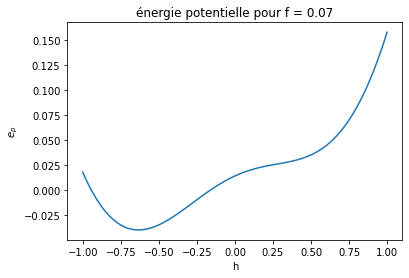

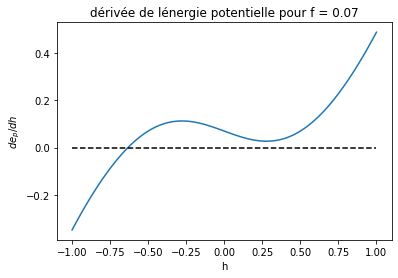

Racine proche de -0.5 :  -0.632943632704266
Racine proche de 0.0 :  0.2774128108301058
Racine proche de 0.5 :  0.27783203145642543


/home/guillaume/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [10]:
#Q7

f = 0.07
h0 = 0.5
listeh = np.linspace(-1.0, 1.0,100)
plt.plot(listeh, ep(listeh,f,h0),'-')
plt.xlabel('h')

plt.ylabel('$e_p$')
plt.title('énergie potentielle pour f = '+str(f))
plt.show()

listeh = np.linspace(-1.0, 1.0,100)
plt.plot(listeh, dep(listeh,f,h0),'-')
plt.plot(listeh, 0*dep(listeh,f,h0),'--k')

plt.xlabel('h')

plt.ylabel('$d e_p/dh$')
plt.title('dérivée de lénergie potentielle pour f = '+str(f))
plt.show()

pdep = 0.01  # la graine : le point de depart de l algo de newton-raph : pas trop loin de la solution si possible

for pdep in (-0.5, 0., .5):
    print("Racine proche de " + str(pdep)+" : ",
          spsopt.fsolve(dep, pdep, fprime=None, args=(f, h0), maxfev=50)[0])
    # full_output=1
    


In [11]:
# Q8

def equ_varf(fmin, fmax, Nstep, h0=0.5):
    out = []  # liste de sortie
    converged = 0
    listef = np.linspace(fmin, fmax, Nstep)
    for f in listef:
        for i in range(5): 
            pdep = random.uniform(-1, 1)     # on teste 5 graines entre -1 et 1
            outNR = spsopt.fsolve(
                dep, pdep, fprime=None, args=(f, h0), maxfev=50)
            sol = outNR[0]  # voici la solution h
            # on verifie quand meme qu on est sur une solution
            error = np.abs(dep(sol, f, h0))
            if error < 1e-9:
                converged = converged+1
                out.append([sol, f])  # structure de out : {h,f}
                #print(f'Step {counter}, new point : {sol}')
    print(f'Newton a convergé {converged} fois sur {5*Nstep}')
    return np.asarray(out)

out = equ_varf(-0.053, 0.064, 100);



Newton a convergé 422 fois sur 500


/home/guillaume/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


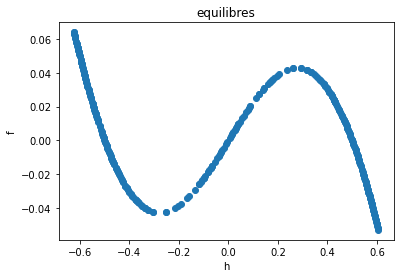

In [12]:
#Q9

plt.plot(out[:,0], out[:,1],'o')
plt.xlabel('h')
plt.ylabel('f')
plt.title('equilibres')
plt.show()



In [13]:
# Q10
def equ_stab_varf(fmin, fmax, Nstep, h0):
    out_stable = []  
    out_instable = []
    converged = 0
    listef = np.linspace(fmin, fmax, Nstep)
    for f in listef:
        for i in range(5): 

            pdep = random.uniform(-1, 1)     # on teste 5 graines entre -1 et 1
            
            outNR = spsopt.fsolve(
                dep, pdep, fprime=None, args=(f, h0), maxfev=50)
            sol = outNR[0]  # voici la solution h
            # on verifie quand meme qu on est sur une solution
            error = np.abs(dep(sol, f, h0))
            if error < 1e-9:
                converged = converged+1
                if ddep(sol,f,h0)>0 : out_stable.append([sol,f])
                else : out_instable.append([sol,f])
    print(f'Newton a convergé {converged} fois sur {5*Nstep}')
    return np.asarray(out_stable), np.asarray(out_instable)



Newton a convergé 416 fois sur 500


/home/guillaume/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guillaume/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


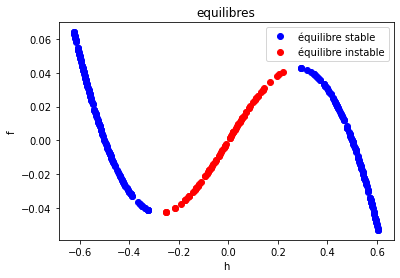

In [14]:
# Q11
out_stable, out_instable = equ_stab_varf(-0.053, 0.064, 100,.5);
plt.plot(out_stable[:,0], out_stable[:,1],'ob', label='équilibre stable')
plt.plot(out_instable[:,0], out_instable[:,1],'or', label='équilibre instable')
plt.legend()
plt.xlabel('h')
plt.ylabel('f')
plt.title('equilibres')
plt.show()



Newton a convergé 500 fois sur 500


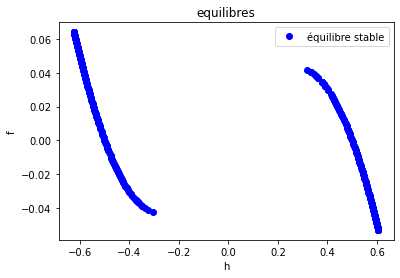

In [15]:
#Q12

def equ_stabonly_varf(fmin, fmax, Nstep, h0):
    out = []
    converged = 0
    listef = np.linspace(fmin, fmax, Nstep)
    for f in listef:
        for i in range(5): 
            pdep = random.uniform(-1, 1) 
            outMIN=spsopt.fmin(ep, pdep, args=(f, h0), maxfun=50,full_output=0, disp=0)
            sol = outMIN[0]
            error = np.abs(dep(sol, f, h0))
            if error < 1e-4: # il faut relaxer error ici !!
                converged = converged+1
                out.append([sol, f])
    print(f'Newton a convergé {converged} fois sur {5*Nstep}')
    return np.asarray(out)

out = equ_stabonly_varf(-0.053, 0.064, 100,.5);
plt.plot(out[:,0], out[:,1],'ob', label='équilibre stable')
plt.legend()
plt.xlabel('h')
plt.ylabel('f')
plt.title('equilibres')
plt.show()


### Fourth test: the unsymmetric von Mises truss

Create a new Jupyter Notebook and save it as *firstname_lastname_TEST4.ipynb*. In this notebook, write a title, introduce this problem with some text then answer the following questions.

**This .ipynb file will have to be uploaded on Moodle by Monday, November 2, 2020 at 6:00pm**

**It will be rated out of 10 (this course unit being rated out of 100)**

The stiffness of the left spring is increased from k to 2k. We thus allow for non-symmetric configurations, corresponding to a horizontal displacement of the point M. The system has now 2 degrees of freedom, x<sub>M</sub> and y<sub>M</sub>=H. Similar to the first section, we introduce a non-dimensional variable for the horizontal position of M, x<sub>M</sub> =αa.

13. Show that the dimensionless potential energy of the system is now

$$ e_p(\alpha, h)= \left( \sqrt{h^2+(1+\alpha)^2} - \ell_0 \right)^2 + \frac{1}{2}\left( \sqrt{h^2+(1-\alpha)^2} - \ell_0 \right)^2 + f h. $$

14. Define the new potential energy and evaluate it numerically for α=0.4, h=0.7, f=.02, ℓ<sub>0</sub>=1.3

15. Define a function ```plot_energy``` that plots the energy as a function of (α,h) for given values of the parameters f and ℓ<sub>0</sub>. You can use ```plt.contourf``` ([have a look at the documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contourf.html)).Display such a plot for (f=.02, ℓ<sub>0</sub>=1.3), (f=0, ℓ<sub>0</sub>=1.3) and (f=.02, ℓ<sub>0</sub>=.6).

16. Use ```spsopt.minimize``` with suitable seeding points to find the local mimima, and add them to the previous plot (f=.02, ℓ=1.3).

17. Plot the equilibrium values of α and h as a function ℓ<sub>0</sub> for f=0 : you just obtained two typical bifurcation diagrams. Redo this question for f=0.02.

**Correction**

Q13.

L'énergie potentielle dimensionnée est donnée par 
$$E_p = \frac{1}{2}2k \left(AM - L_0 \right)^2 + \frac{1}{2}k \left(BM - L_0 \right)^2 + FH(t) $$


Ainsi, 
$$E_p = k \left(\sqrt{(a+\alpha a)^2+H(t)^2} - L_0^2 \right)^2+ \frac{1}{2}k \left(\sqrt{(a-\alpha a)^2+H(t)^2}  - L_0 \right)^2 + FH(t) $$
qui donne le résultat annoncé en passant sans dimension.



In [20]:
#Q14

h = sym.Symbol('h')
ell0 = sym.Symbol('ell0')
f = sym.Symbol('f')
alpha=sym.Symbol('alpha')
ep2_symb= (sym.sqrt(h**2+(1+alpha)**2) - ell0 )**2+.5*(sym.sqrt(h**2+(1-alpha)**2) - ell0 )**2 + f * h
ep_2 = sym.lambdify((alpha,h,f,ell0),ep2_symb,"numpy")

print("ep = ", ep_2(0.4,0.7,.02,1.3))

ep =  0.15581550150230744


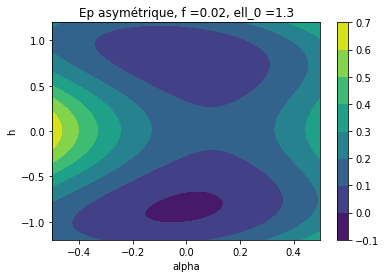

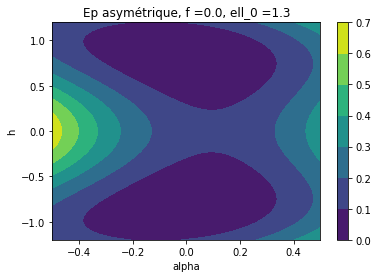

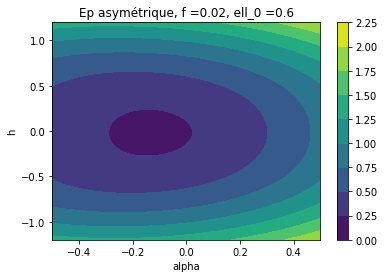

In [17]:
#Q15
def plot_energy(alpha_min,alpha_max,h_min,h_max, f, ell0):
    alpha_list = np.linspace(alpha_min,alpha_max,100)
    h_list = np.linspace(h_min,h_max,100)
    X, Y = np.meshgrid(alpha_list,h_list)
    Z = ep_2(X,Y,f,ell0) 
    plt.contourf(X,Y,Z)
    plt.ylabel('h')
    plt.xlabel('alpha')
    plt.title('Ep asymétrique, f ='+str(f)+', ell_0 ='+str(ell0))
    plt.colorbar()
#    plt.show()
    
plot_energy(-.5,.5,-1.2,1.2,f=.02,ell0=1.3)
plt.show()
plot_energy(-.5,.5,-1.2,1.2,f=.00,ell0=1.3)
plt.show()
plot_energy(-.5,.5,-1.2,1.2,f=.02,ell0=.6)
plt.show()


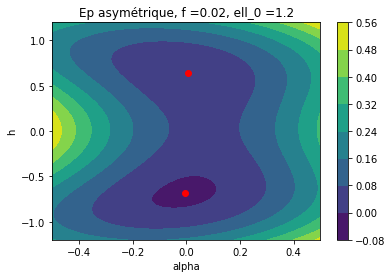

In [18]:
#Q16

# pour scipy.optimize.minimize, il faut une fonction f(x,args) où x est un vecteur suivant lequel on minimise (ici
# de dimension 2) et args idem avec les paramètres fixés. On définit donc la fonction adéquat ep_2_new
def ep_2_new(x,pars) :
    return ep_2(x[0],x[1], pars[0], pars[1])

p1 = spsopt.minimize(ep_2_new, [0.0,1.0], args=np.array([0.02,1.2])) 
p2 = spsopt.minimize(ep_2_new, [0.0,-1.0], args=np.array([0.02,1.2]))

plot_energy(-.5,.5,-1.2,1.2,f=.02,ell0=1.2)
plt.plot(p1.x[0],p1.x[1],"or")
plt.plot(p2.x[0],p2.x[1],"or")
plt.show()



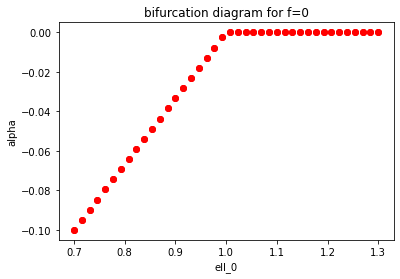

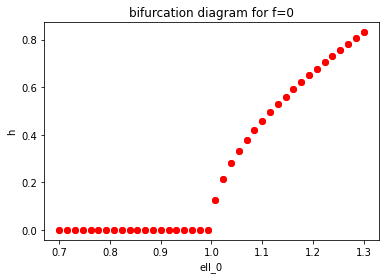

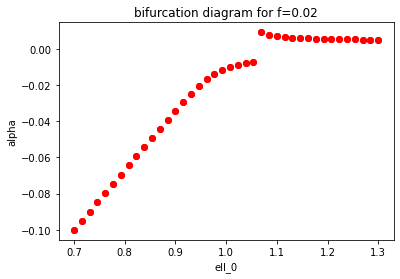

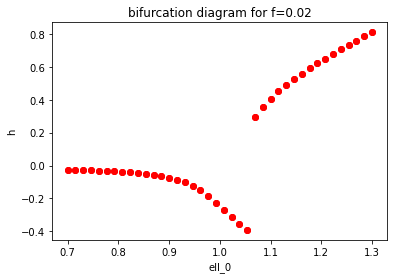

In [19]:
# Q17

for F in [0,0.02]:
    ell0_list=np.linspace(.7,1.3,40)
    lplot_list=[]
    hplot_list=[]
    alphaplot_list=[]
    for ell0 in ell0_list:
        p1 = spsopt.minimize(ep_2_new, [1.0,0.0], args=np.array([F,ell0])) 
        p2 = spsopt.minimize(ep_2_new, [-1.0,0.0], args=np.array([F,ell0]))
        lplot_list.append([ell0, ell0])
        hplot_list.append([p1.x[1],p2.x[1]])
        alphaplot_list.append([p1.x[0],p2.x[0]])

    #plt.plot(lplot_list,hplot_list,"or")
    plt.plot(lplot_list,alphaplot_list,"or")
    plt.xlabel('ell_0')
    plt.ylabel('alpha')
    plt.title('bifurcation diagram for f='+str(F))
    plt.show()

    plt.plot(lplot_list,hplot_list,"or")
    plt.xlabel('ell_0')
    plt.ylabel('h')
    plt.title('bifurcation diagram for f='+str(F))
    plt.show()